In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import torch
import copy
from models import *
from utils import *
from dotenv import load_dotenv
import os

load_dotenv()

api_key = os.getenv('API_KEY')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


ModuleNotFoundError: No module named 'dotenv'

In [ ]:
# most ml models have a specific input shape that they expect
# making everythign 30x30
# convert the whole thing to an image

# Model ideas
# 1. CNN
# 2. S4 -> sequence model, 4 ways 
# Transformer -> sequence model, 4 ways
# Ensembling 

# CNN model
# 1. Input shape 30x30
# 2. 2D Convolutional layer
# 3. 2D Max pooling layer
# 4. 2D Convolutional layer
# 5. 2D Max pooling layer
# 6. Flatten layer
# 7. Dense layer
# 8. Output layer
# Training -> Want to make it such that the model predicts the output of each pixel


#New idea
# Encode things as differece in shifts as opposed to color values, such that the training examples become related

In [ ]:
# File paths
test_challenge_file_path = 'arc-prize-2024/arc-agi_test_challenges.json'
training_challenge_file_path = 'arc-prize-2024/arc-agi_training_challenges.json'
training_solutions_file_path = 'arc-prize-2024/arc-agi_training_solutions.json'
evaluation_challenge_file_path = 'arc-prize-2024/arc-agi_evaluation_challenges.json'
evaluation_solutions_file_path = 'arc-prize-2024/arc-agi_evaluation_solutions.json'

# Load JSON files
with open(test_challenge_file_path, 'r') as file:
    test_challenges_data = json.load(file)

with open(training_challenge_file_path, 'r') as file:
    training_challenges_data = json.load(file)

with open(training_solutions_file_path, 'r') as file:
    training_solutions_data = json.load(file)

with open(evaluation_challenge_file_path, 'r') as file:
    evaluation_challenges_data = json.load(file)

with open(evaluation_solutions_file_path, 'r') as file:
    evaluation_solutions_data = json.load(file)

# Convert JSON data to DataFrames
test_challenges_df = json_to_dataframe(test_challenges_data)
training_challenges_df = json_to_dataframe(training_challenges_data, training_solutions_data)
evaluation_challenges_df = json_to_dataframe(evaluation_challenges_data, evaluation_solutions_data)

# Display the DataFrames
print("Test Challenges DataFrame:")
display(test_challenges_df.head())
print("\nTraining Challenges DataFrame:")
display(training_challenges_df.head())
print("\nEvaluation Challenges DataFrame:")
display(evaluation_challenges_df.head())

# Save DataFrames to CSV files
test_challenges_df.to_csv('test_challenges_data.csv', index=False)
training_challenges_df.to_csv('training_challenges_data.csv', index=False)
evaluation_challenges_df.to_csv('evaluation_challenges_data.csv', index=False)

Test Challenges DataFrame:


,id,train,test
0,007bbfb7,"[{'input': [[0, 7, 7], [7, 7, 7], [0, 7, 7]], ...","[{'input': [[7, 0, 7], [7, 0, 7], [7, 7, 0]]}]"
1,00d62c1b,"[{'input': [[0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 0...","[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,017c7c7b,"[{'input': [[0, 1, 0], [1, 1, 0], [0, 1, 0], [...","[{'input': [[1, 1, 1], [0, 1, 0], [0, 1, 0], [..."
3,025d127b,"[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 6...","[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0..."
4,045e512c,"[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."



Training Challenges DataFrame:


,id,train,test
0,007bbfb7,"[{'input': [[0, 7, 7], [7, 7, 7], [0, 7, 7]], ...","[{'input': [[7, 0, 7], [7, 0, 7], [7, 7, 0]], ..."
1,00d62c1b,"[{'input': [[0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 0...","[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,017c7c7b,"[{'input': [[0, 1, 0], [1, 1, 0], [0, 1, 0], [...","[{'input': [[1, 1, 1], [0, 1, 0], [0, 1, 0], [..."
3,025d127b,"[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 6...","[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0..."
4,045e512c,"[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."



Evaluation Challenges DataFrame:


,id,train,test
0,00576224,"[{'input': [[8, 6], [6, 4]], 'output': [[8, 6,...","[{'input': [[3, 2], [7, 8]], 'output': [[3, 2,..."
1,009d5c81,"[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,00dbd492,"[{'input': [[2, 2, 2, 2, 2, 0, 0], [2, 0, 0, 0...","[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,03560426,"[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0...","[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0..."
4,05a7bcf2,"[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, ..."


In [ ]:
a, b, c, d = filter_data_by_id('007bbfb7', training_challenges_df)
e, f, g, h = filter_data_by_id('00576224', evaluation_challenges_df)
i, j, k = filter_data_by_id('007bbfb7', test_challenges_df, solution=False)
a

[[7, 0, 7], [7, 0, 7], [7, 7, 0]]

In [ ]:
train_ids = training_challenges_df['id'].values
eval_ids = evaluation_challenges_df['id'].values
test_ids = test_challenges_df['id'].values

print(len(training_challenges_df['id'].values))
print(len(evaluation_challenges_df['id'].values))
print(len(test_challenges_df['id'].values))

400
400
100


In [ ]:
train_set = []
train_predict_set = []
eval_set = []
eval_predict_set = []
test_set = []

for i in range(len(train_ids)):
    a, b, c, d = filter_data_by_id(train_ids[i], training_challenges_df)
    train_set.append({'id': train_ids[i], 'input': c, 'output': d})
    train_predict_set.append({'id': train_ids[i], 'input': [a], 'output': [b]})
    e, f, g, h = filter_data_by_id(eval_ids[i], evaluation_challenges_df)
    eval_set.append({'id': eval_ids[i], 'input': g, 'output': h})
    eval_predict_set.append({'id': train_ids[i], 'input': [e], 'output': [f]})

for i in range(len(test_ids)):
    i, j, k = filter_data_by_id(test_ids[i], test_challenges_df, solution=False)
    test_set.append({'id': test_ids[i], 'input': k})

train_set_df = pd.DataFrame(train_set)
eval_set_df = pd.DataFrame(eval_set)
test_set_df = pd.DataFrame(test_set)
train_predict_set_df = pd.DataFrame(train_predict_set)
eval_predict_set_df = pd.DataFrame(eval_predict_set)

display(train_predict_set_df.head())
display(train_set_df.head())
    

,id,input,output
0,007bbfb7,"[[[7, 0, 7], [7, 0, 7], [7, 7, 0]]]","[[[7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 0, 7, 0, 0,..."
1,00d62c1b,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
2,017c7c7b,"[[[1, 1, 1], [0, 1, 0], [0, 1, 0], [1, 1, 1], ...","[[[2, 2, 2], [0, 2, 0], [0, 2, 0], [2, 2, 2], ..."
3,025d127b,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 4, 4, 4,...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 4, 4,..."
4,045e512c,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4..."


,id,input,output
0,007bbfb7,"[[[0, 7, 7], [7, 7, 7], [0, 7, 7]], [[4, 0, 4]...","[[[0, 0, 0, 0, 7, 7, 0, 7, 7], [0, 0, 0, 7, 7,..."
1,00d62c1b,"[[[0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 0, 0], [0, ...","[[[0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 0, 0], [0, ..."
2,017c7c7b,"[[[0, 1, 0], [1, 1, 0], [0, 1, 0], [0, 1, 1], ...","[[[0, 2, 0], [2, 2, 0], [0, 2, 0], [0, 2, 2], ..."
3,025d127b,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 6, 6, 6, 0,...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 6, 6, 6,..."
4,045e512c,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."


In [ ]:

train_set_df['standardized_input'] = train_set_df['input'].apply(standardize_data)
train_set_df['standardized_output'] = train_set_df['output'].apply(standardize_data)
train_predict_set_df['standardized_input'] = train_predict_set_df['input'].apply(standardize_data)
train_predict_set_df['standardized_output'] = train_predict_set_df['output'].apply(standardize_data)
eval_set_df['standardized_input'] = eval_set_df['input'].apply(standardize_data)
eval_set_df['standardized_output'] = eval_set_df['output'].apply(standardize_data)
eval_predict_set_df['standardized_input'] = eval_predict_set_df['input'].apply(standardize_data)
eval_predict_set_df['standardized_output'] = eval_predict_set_df['output'].apply(standardize_data)
test_set_df['standardized_input'] = test_set_df['input'].apply(standardize_data)

display(train_set_df.head())

,id,input,output,standardized_input,standardized_output
0,007bbfb7,"[[[0, 7, 7], [7, 7, 7], [0, 7, 7]], [[4, 0, 4]...","[[[0, 0, 0, 0, 7, 7, 0, 7, 7], [0, 0, 0, 7, 7,...","[[[0, 7, 7, 11, 11, 11, 11, 11, 11, 11, 11, 11...","[[[0, 0, 0, 0, 7, 7, 0, 7, 7, 11, 11, 11, 11, ..."
1,00d62c1b,"[[[0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 0, 0], [0, ...","[[[0, 0, 0, 0, 0, 0], [0, 0, 3, 0, 0, 0], [0, ...","[[[0, 0, 0, 0, 0, 0, 11, 11, 11, 11, 11, 11, 1...","[[[0, 0, 0, 0, 0, 0, 11, 11, 11, 11, 11, 11, 1..."
2,017c7c7b,"[[[0, 1, 0], [1, 1, 0], [0, 1, 0], [0, 1, 1], ...","[[[0, 2, 0], [2, 2, 0], [0, 2, 0], [0, 2, 2], ...","[[[0, 1, 0, 11, 11, 11, 11, 11, 11, 11, 11, 11...","[[[0, 2, 0, 11, 11, 11, 11, 11, 11, 11, 11, 11..."
3,025d127b,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 6, 6, 6, 0,...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 6, 6, 6,...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 11, 11, 11, ...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 11, 11, 11, ..."
4,045e512c,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."


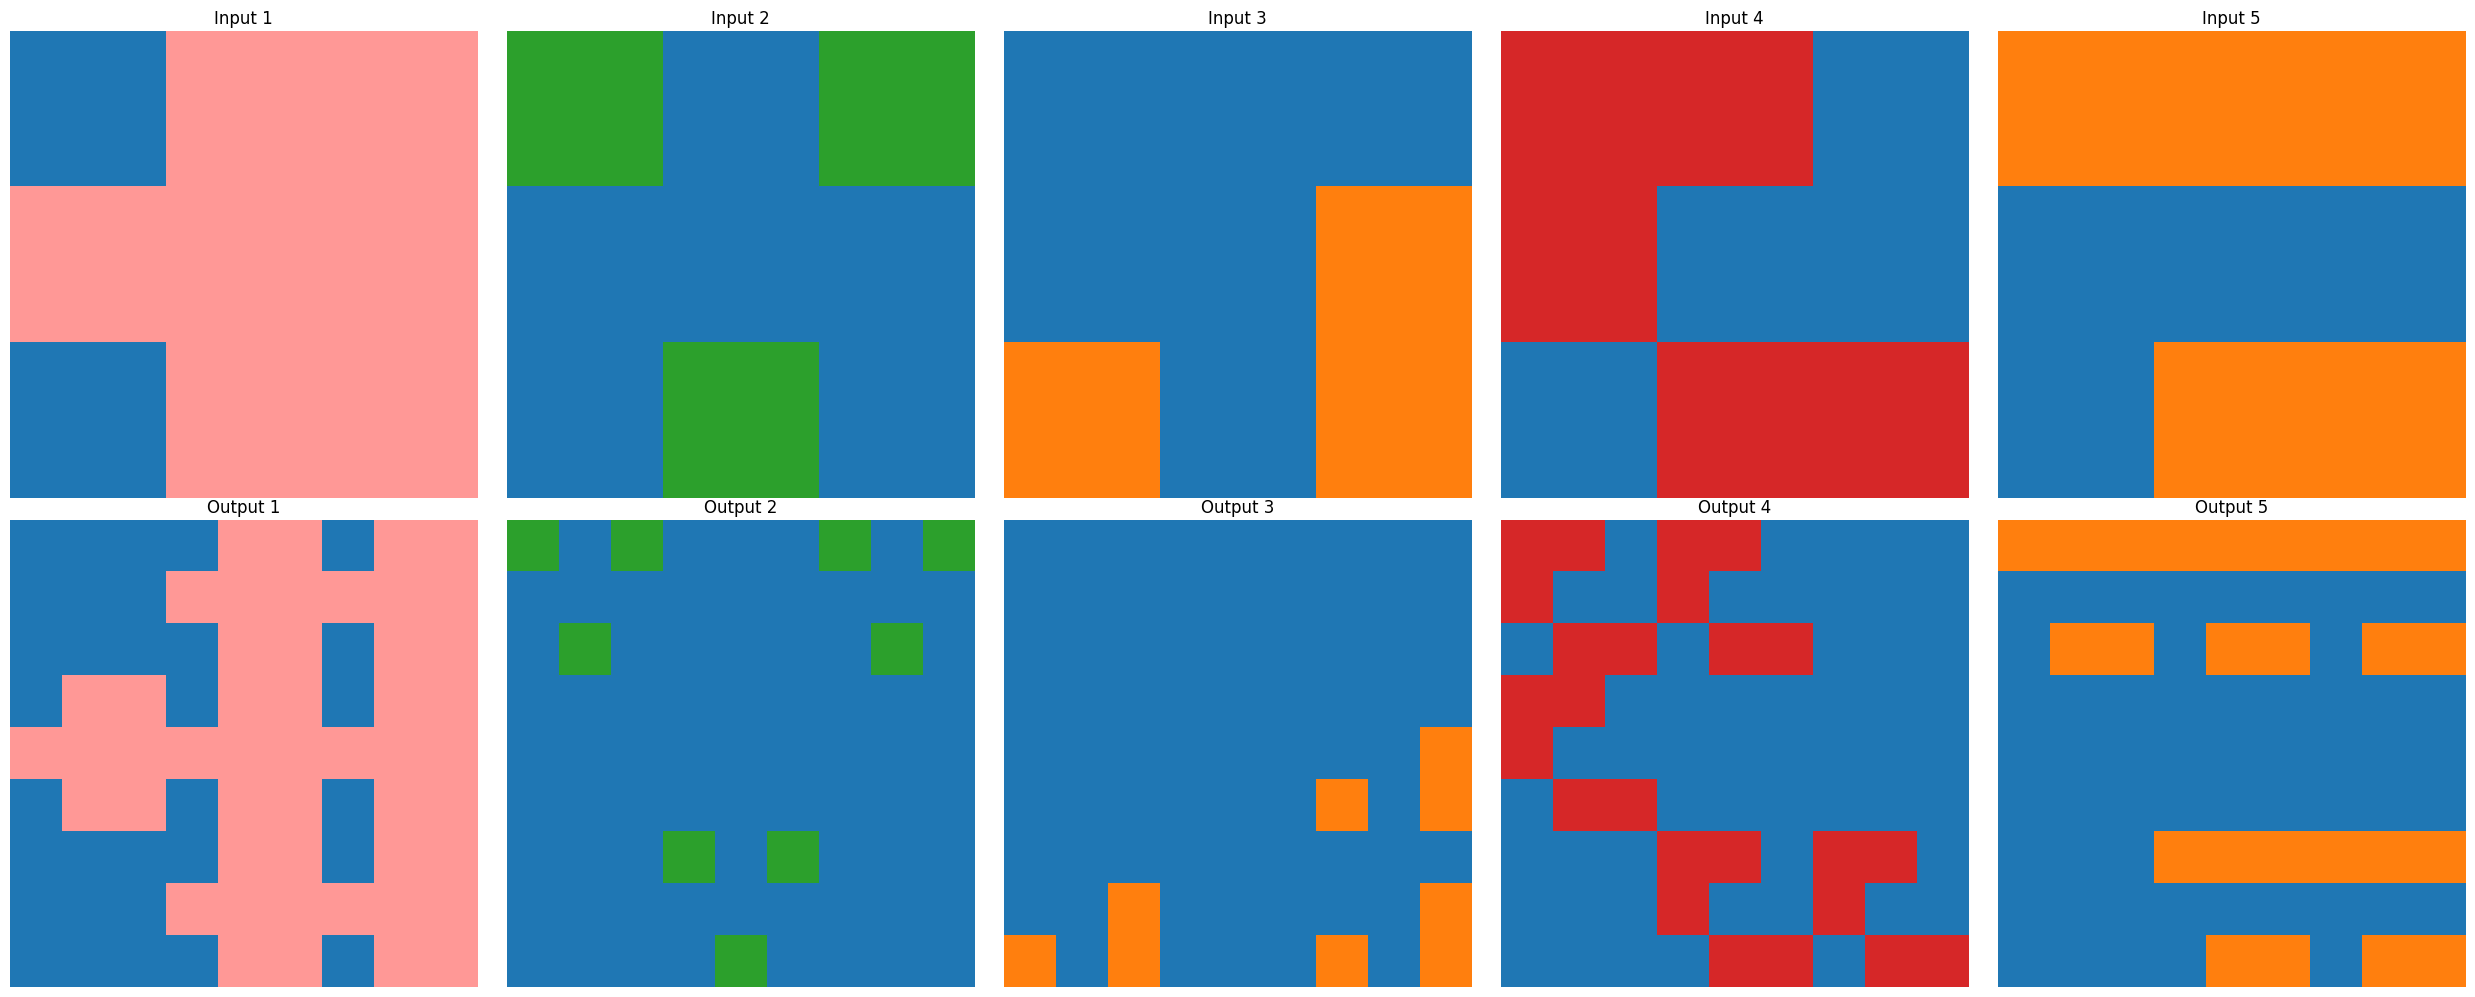

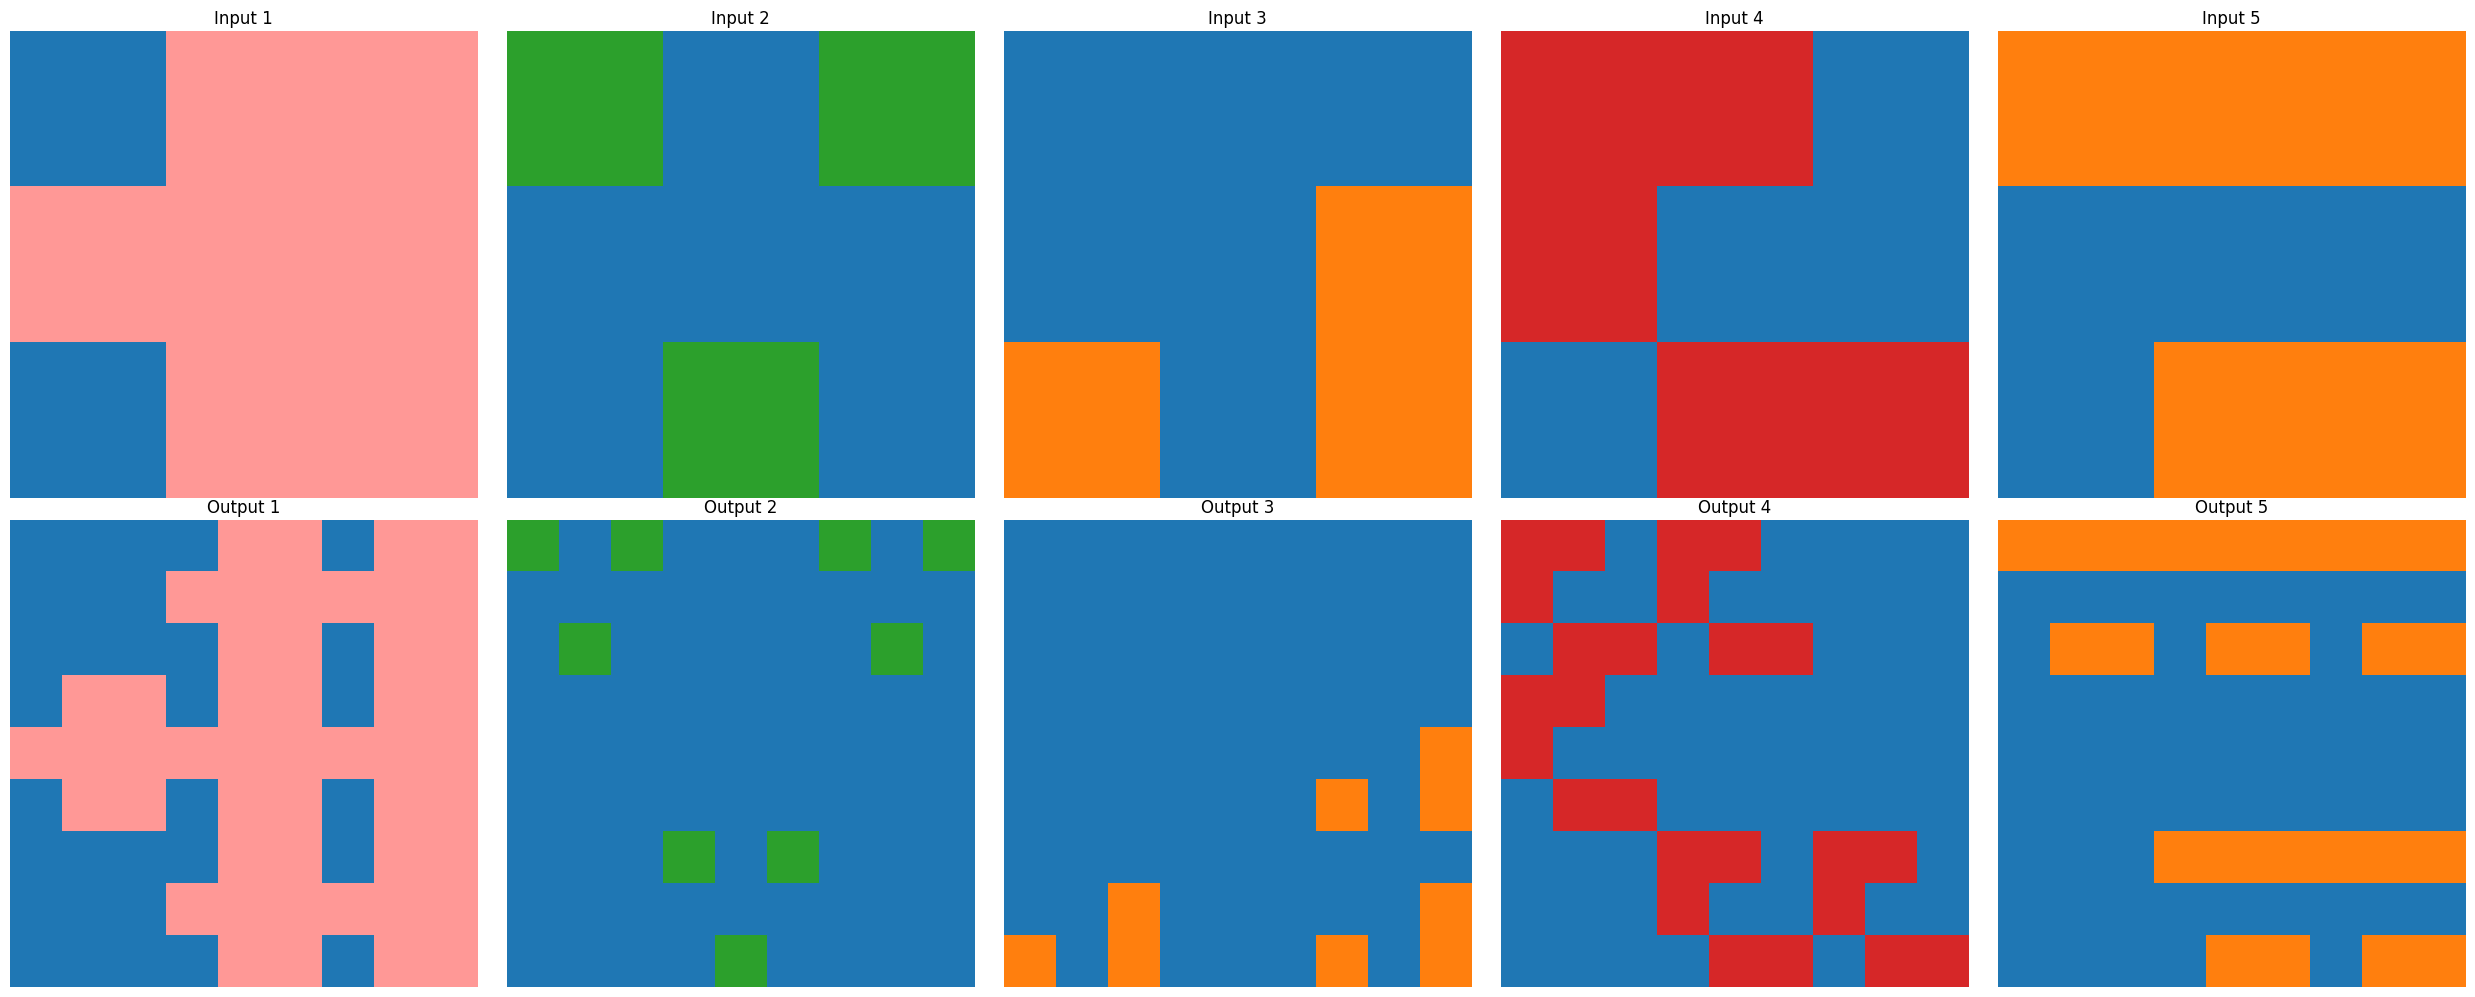

In [ ]:
# visualize_from_data(c, d)

for i in training_challenges_df.head(1)['id'].values:
    a, b, c, d = filter_data_by_id(i, training_challenges_df)
    visualize_from_data(c, d)
visualize_from_id('007bbfb7', training_challenges_df)

(7, 7, 3, 3)
(7, 7, 3, 3)
(7, 7, 3, 3)
(7, 7, 3, 3)
(7, 7, 3, 3)


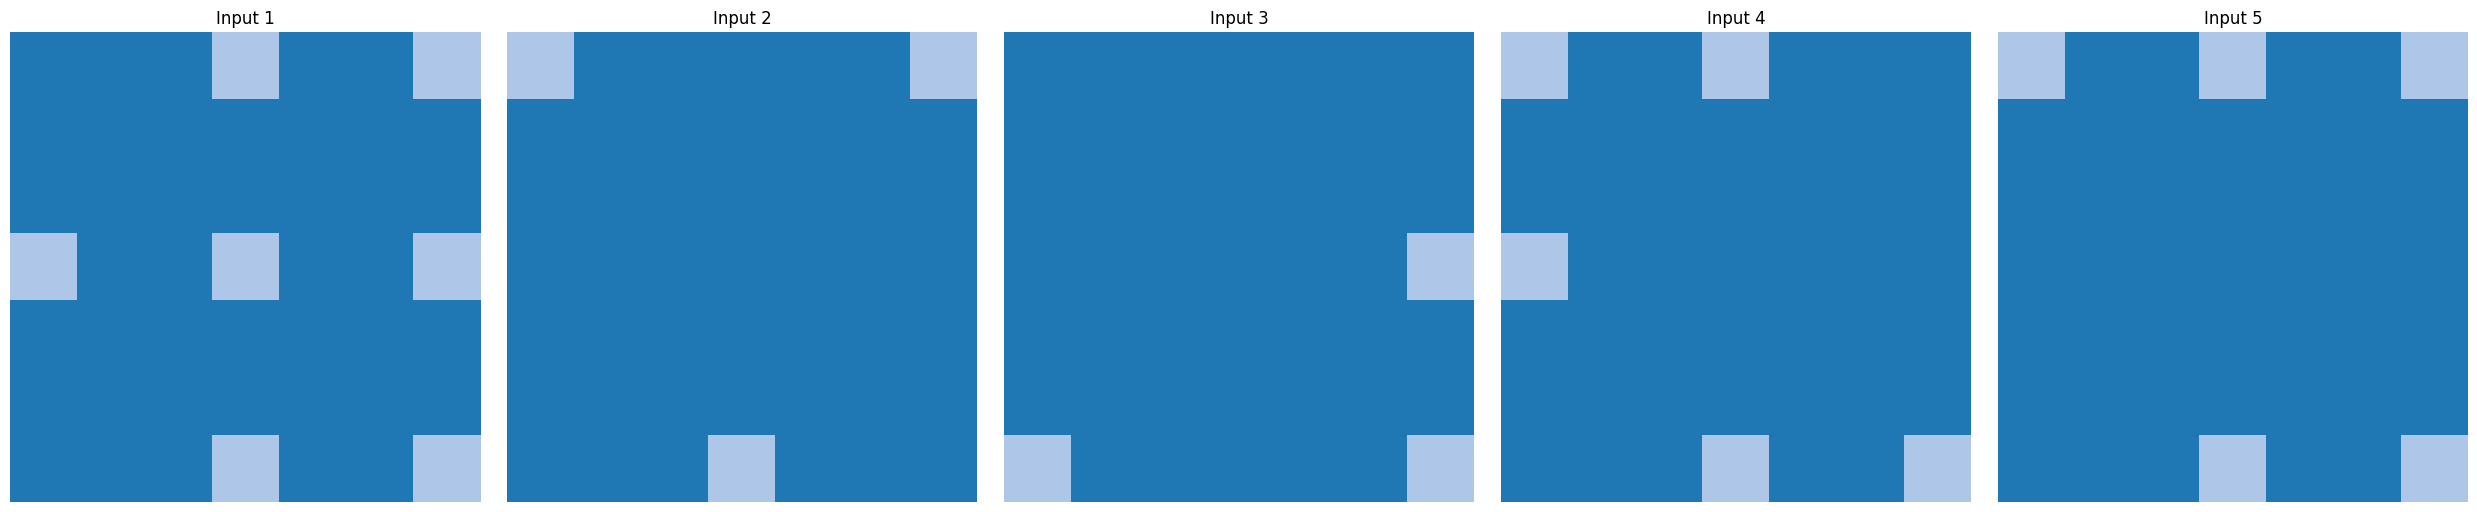

In [ ]:
from typing import List, Tuple

class FeatureExtractor():
    def __init__(self):
        pass

    def extract(self, pairs):
        output = {}
        output.update(self._subpatterns(pairs))
        return output

    def _subpatterns(self, pairs: Tuple[np.array, np.array]):
        return {
            'input_in_output': self._input_in_output(pairs)
        }

    def _chunk_matrix(self, matrix: np.array, size: Tuple[int, int]):
        chunks = []
        for i in range(0, matrix.shape[0] - size[0] + 1):
            row = []
            for j in range(0, matrix.shape[1] - size[1] + 1):
                row.append(matrix[i:i+size[0], j:j+size[1]])
            chunks.append(row)
        return np.array(chunks)

    def _input_in_output(self, pairs: List[Tuple[np.array, np.array]]):
        pairs_matches = []
        for input, output in pairs:
            output_chunks = self._chunk_matrix(output, input.shape)
            print(output_chunks.shape)
            matches = np.zeros([output_chunks.shape[0], output_chunks.shape[1]], dtype=int)
            for i in range(len(matches)):
                for j in range(len(matches[0])):
                    if np.array_equal(input, output_chunks[i][j]):
                        matches[i][j] = 1
            pairs_matches.append(matches)
        return pairs_matches


a,b,c,d = filter_data_by_id('007bbfb7', training_challenges_df)

feature_extractor = FeatureExtractor()

pairs=[(np.array(c_i).astype(int), np.array(d_i).astype(int)) for c_i, d_i in zip(c, d)]

test = feature_extractor.extract(pairs)['input_in_output']

visualize_from_data(test)
            
    
#test


In [ ]:
class TreeSearch:
    def __init__(self) -> None:
        pass
    
    


(7, 7, 3, 3)

In [ ]:
def train_cnn_model(model, train_data, loss_function, optimizer, epochs=10, **kwargs):
    model.to(device)
    model.train()

    for epoch in range(epochs):
        for i in range(len(train_data)):
            for j in range(len(train_data['standardized_input'].iloc[i])):
                input_data = torch.tensor(train_data['standardized_input'].iloc[i][j]).unsqueeze(0).float().to(device)
                output_data = torch.tensor(train_data['standardized_output'].iloc[i][j]).unsqueeze(0).long().to(device)
                #print(output_data.shape, input_data.shape)
                optimizer.zero_grad()
                predictions = predictions = torch.zeros(1, 12, len(output_data[0]), len(output_data[0][0])).to(device)
                for k in range(len(output_data[0])):
                    for l in range(len(output_data[0][0])):
                        output = model(input_data, height_index=k, width_index=l, height=k, width=l).squeeze()
                        predictions[0, :, k, l] = output
                #print(output_data.shape, predictions.shape)
                loss = loss_function(predictions[:len(output_data), :len(output_data[0])], output_data)
                loss.backward()
                optimizer.step()
            if i % 100 == 0:
                print(f"Epoch: {epoch + 1}, Loss: {loss.item()}")

# Evaluation
def evaluate_model(model, data):
    correct = 0
    total = 0
    with torch.no_grad():
        for i in range(len(data)):
            input_data = torch.tensor(data['standardized_input'].iloc[i]).unsqueeze(0).float().to(device)
            output_data = torch.tensor(data['standardized_output'].iloc[i]).unsqueeze(0).long().to(device)
            model.eval()
            predictions = predictions = torch.zeros(1, 12, len(output_data[0][0]), len(output_data[0][0][0])).to(device)
            for k in range(len(output_data)):
                for l in range(len(output_data[0])):
                    output = model(input_data, height_index=k, width_index=l, height=k, width=l).squeeze()
                    predictions[0, :, k, l] = torch.argmax(output)
            total += output_data[0] * output_data[0][0]
            correct += (predictions == output_data).sum().item()
    print(f"Accuracy: {correct / total}")

def predict(model, data, i):
    model.to(device)
    predictions = []
    with torch.no_grad():
        input_data = torch.tensor(data['standardized_input'].iloc[i]).unsqueeze(0).float().to(device)
        output_data = torch.tensor(data['standardized_output'].iloc[i]).unsqueeze(0).long().to(device)
        model.eval()
        predictions = torch.zeros(1, 1, len(output_data[0][0]), len(output_data[0][0][0])).to(device)
        for k in range(len(output_data[0][0])):
            for l in range(len(output_data[0][0][0])):
                output = model(input_data, height_index=k, width_index=l, height=k, width=l).squeeze()
                predictions[0, 0, k, l] = torch.argmax(output)
    print(predictions.shape)
    return predictions


In [ ]:
model = CNNModel()

# Loss function
loss_function = torch.nn.CrossEntropyLoss()
loss_function.to(device)

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


for state in optimizer.state.values():
    for k, v in state.items():
        if isinstance(v, torch.Tensor):
            state[k] = v.to(device)
            
train_cnn_model(model, train_set_df, loss_function, optimizer, epochs=1, device = device)



Epoch: 1, Loss: 0.28885480761528015


KeyboardInterrupt: 

torch.Size([1, 1, 30, 30])
torch.Size([1, 1, 30, 30])
torch.Size([1, 30, 30])
torch.Size([1, 1, 30, 30])
torch.Size([1, 1, 30, 30])


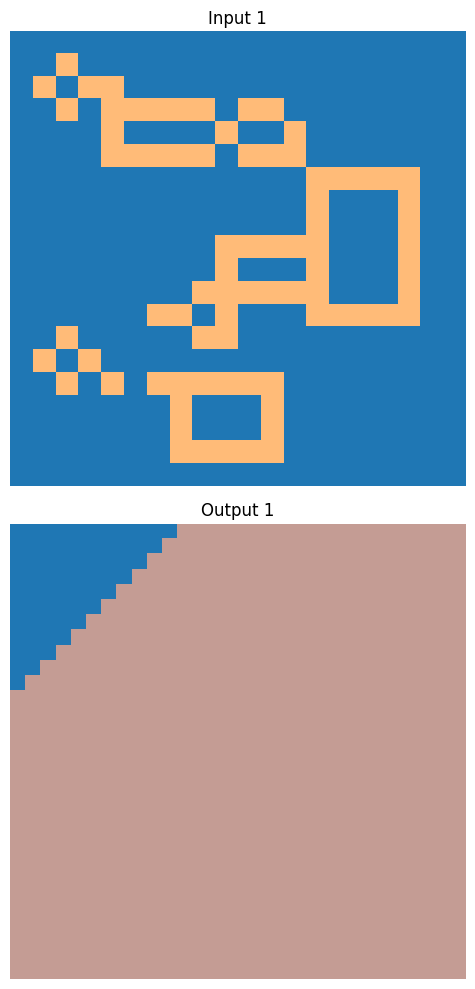

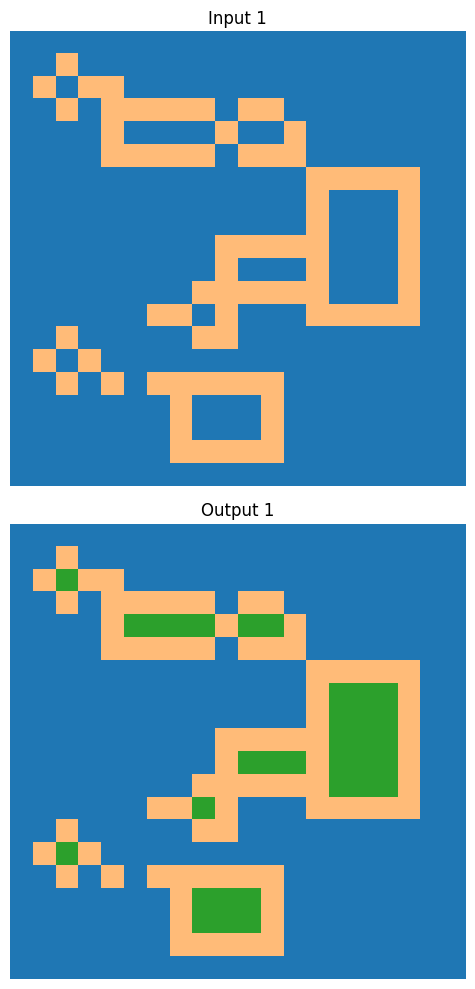

In [ ]:
prediction = predict(model, train_predict_set_df, 1)
print(prediction.squeeze().unsqueeze(0).shape)
visualize_from_data(train_predict_set_df['input'].iloc[1], predict(model, train_predict_set_df, 1).detach().cpu().squeeze().unsqueeze(0).numpy())
visualize_from_data(train_predict_set_df['input'].iloc[1], train_predict_set_df['output'].iloc[1])

In [ ]:
train_predict_set_df.iloc[0]

id                                                              007bbfb7
input                                [[[7, 0, 7], [7, 0, 7], [7, 7, 0]]]
output                 [[[7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 0, 7, 0, 0,...
standardized_input     [[[7, 0, 7, 11, 11, 11, 11, 11, 11, 11, 11, 11...
standardized_output    [[[7, 0, 7, 0, 0, 0, 7, 0, 7, 11, 11, 11, 11, ...
Name: 0, dtype: object

In [ ]:
model.eval()
evaluate_model(model, train_predict_set_df.head(1))

Accuracy: tensor([[[11.0204,     inf, 11.0204,     inf,     inf,     inf, 11.0204,
              inf, 11.0204,  4.4628,  4.4628,  4.4628,  4.4628,  4.4628,
           4.4628,  4.4628,  4.4628,  4.4628,  4.4628,  4.4628,  4.4628,
           4.4628,  4.4628,  4.4628,  4.4628,  4.4628,  4.4628,  4.4628,
           4.4628,  4.4628],
         [11.0204,     inf, 11.0204,     inf,     inf,     inf, 11.0204,
              inf, 11.0204,  4.4628,  4.4628,  4.4628,  4.4628,  4.4628,
           4.4628,  4.4628,  4.4628,  4.4628,  4.4628,  4.4628,  4.4628,
           4.4628,  4.4628,  4.4628,  4.4628,  4.4628,  4.4628,  4.4628,
           4.4628,  4.4628],
         [11.0204, 11.0204,     inf,     inf,     inf,     inf, 11.0204,
          11.0204,     inf,  4.4628,  4.4628,  4.4628,  4.4628,  4.4628,
           4.4628,  4.4628,  4.4628,  4.4628,  4.4628,  4.4628,  4.4628,
           4.4628,  4.4628,  4.4628,  4.4628,  4.4628,  4.4628,  4.4628,
           4.4628,  4.4628],
         [11.0204,     inf,

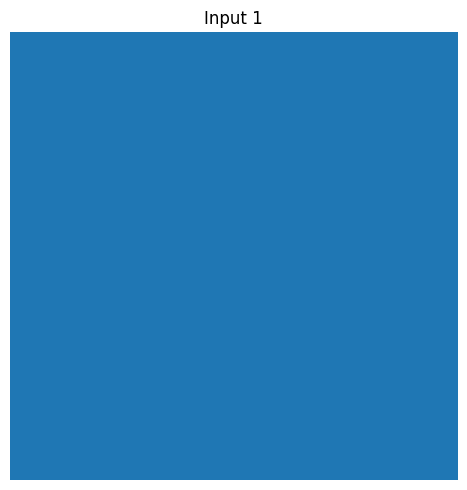

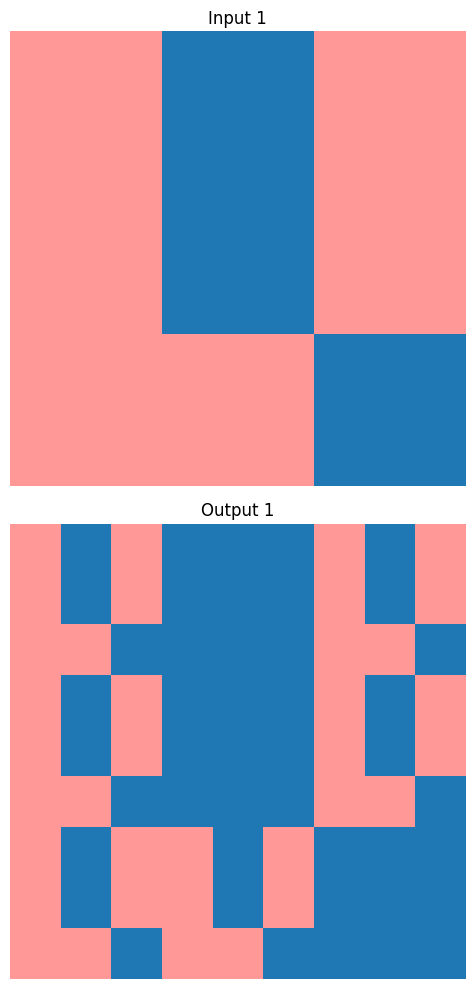

In [ ]:
predictions = predict(model, train_predict_set_df)
visualize_from_data(predictions[0])
visualize_from_data([i for i in train_predict_set_df['input']][0], [i for i in train_predict_set_df['output']][0])